<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-Дерево-Решений" data-toc-modified-id="Модель-Дерево-Решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель Дерево Решений</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Модель-Случаный-лес" data-toc-modified-id="Модель-Случаный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель Случаный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений-для-нестрафицированной-выборки." data-toc-modified-id="Дерево-решений-для-нестрафицированной-выборки.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений для нестрафицированной выборки.</a></span></li><li><span><a href="#Логистическая-регрессия-для-нестрафицированной-выборки." data-toc-modified-id="Логистическая-регрессия-для-нестрафицированной-выборки.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Логистическая регрессия для нестрафицированной выборки.</a></span></li><li><span><a href="#Случайный-лес-для-нестрафицированной-выборки." data-toc-modified-id="Случайный-лес-для-нестрафицированной-выборки.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес для нестрафицированной выборки.</a></span></li><li><span><a href="#Дерево-решений-на-стратифицированной-выборке" data-toc-modified-id="Дерево-решений-на-стратифицированной-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Дерево решений на стратифицированной выборке</a></span></li><li><span><a href="#Логистическая-регрессия-на-стратифицированной-выборке" data-toc-modified-id="Логистическая-регрессия-на-стратифицированной-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Логистическая регрессия на стратифицированной выборке</a></span></li><li><span><a href="#Случайный-лес-на-стратифицированной-выборке" data-toc-modified-id="Случайный-лес-на-стратифицированной-выборке-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Случайный лес на стратифицированной выборке</a></span></li><li><span><a href="#Полученные-результаты" data-toc-modified-id="Полученные-результаты-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Полученные результаты</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from scipy.stats import uniform

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

import warnings

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

**Целевой признак**

*Exited* — факт ухода клиента

**Признаки**

*RowNumber* — индекс строки в данных

*CustomerId* — уникальный идентификатор клиента

*Surname* — фамилия

*CreditScore* — кредитный рейтинг

*Geography* — страна проживания

*Gender* — пол

*Age* — возраст

*Tenure* — сколько лет человек является клиентом банка

*Balance* — баланс на счёте

*NumOfProducts* — количество продуктов банка, используемых клиентом

*HasCrCard* — наличие кредитной карты

*IsActiveMember* — активность клиента

*EstimatedSalary* — предполагаемая зарплата

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Пропуски в данных.

In [5]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Заполним пропуски в данных с помощью KNNImputer.

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
numerics =['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

data[numerics] = pd.DataFrame(imputer.fit_transform(data[numerics]),columns =data[numerics].columns)

data['Tenure'] = round(data['Tenure'])
data['Tenure'].value_counts()

6.0     1145
5.0     1116
4.0     1106
3.0     1009
7.0     1006
2.0      986
8.0      965
1.0      955
9.0      884
10.0     446
0.0      382
Name: Tenure, dtype: int64

Приведем тип данных столбца Tenure к типу int.

In [7]:
data['Tenure'] = data['Tenure'].astype("int")

Проверим на данные на явные дуликаты.

In [8]:
data.duplicated().sum()

0

Проверим признаки на корреляцию между собой.

In [9]:
data.corr().style.background_gradient(cmap='PuBuGn')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.008959,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.019439,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000103,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.010235,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.008959,-0.019439,0.000103,-0.010235,1.000000,-0.008465,0.011686,0.023706,-0.030958,0.011107,-0.014600
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.008465,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011686,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.023706,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.030958,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.011107,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Корреляция между признаками не значительна.

Проведем прямое кодирование (OHE), чтобы преобразовать категориальные признаки в численные. Столбец 'Surname' удалим, так как фамилия клиента не тот признак, который мог бы влиять на факт ухода клиента.

In [10]:
data=data.drop(columns=['Surname'])
data_ohe = pd.get_dummies(data, drop_first = True)

Разобьем выборки на тренировочную, валидационную и тестовую в соотношениях 3:1:1

In [11]:
features = data_ohe.drop(columns=['Exited','RowNumber','CustomerId'])
target = data_ohe['Exited']

#Отделим тестовую выборку 
features_split, features_test, target_split, target_test = train_test_split(features,target,test_size=0.2 ,random_state=12345) #,stratify = target

#Разделим оставшуюся часть данных на тренировочную и валидационную выборки
features_train, features_valid, target_train, target_valid = train_test_split(features_split,target_split,test_size=0.25 ,random_state=12345) #,stratify = target_split

In [12]:
print(f'Длина тестовой выборки: {features_test.shape[0]}',
    f'\nДлина валидационной выборки: {features_valid.shape[0]}',
    f'\nДлина тренировочной выборки: {features_train.shape[0]}')

print(f'Соотношение размеров выборок: {features_train.shape[0] / features_valid.shape[0]}')

Длина тестовой выборки: 2000 
Длина валидационной выборки: 2000 
Длина тренировочной выборки: 6000
Соотношение размеров выборок: 3.0


Приведем признаки к одному масштабу.

In [13]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

Рассмотрим распределение классов по выборке.

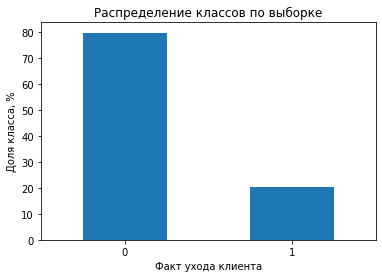

In [14]:
(target.value_counts(normalize=True)*100).plot(kind='bar',xlabel='Факт ухода клиента',ylabel='Доля класса, %',title='Распределение классов по выборке',rot=0)
plt.show()

Из банка уходят только 20% клиентов. Соотношение классов  4 к 1.

In [15]:
# Функция для определения метрик модели
def model_researh(model,features_x,target_x,output=None):
    
    predictions = model.predict(features_x)
    proba_one_valid = model.predict_proba(features_x)[:,1]
    precision = precision_score(target_x,predictions)
    recall = recall_score(target_x,predictions)
    auc_roc = roc_auc_score(target_x,proba_one_valid)
    f1 = f1_score(target_x,predictions)
    
    #добавлен параметр output для вывода численных значний метрик
    if output:
        return precision, recall, auc_roc, f1
      
    else:
        print(f'Параметры модели: {model.best_estimator_}')
        print(f'Полученные метрики:\n{precision=:.3f}\n{recall=:.3f}\n{auc_roc=:.3f}\n{f1=:.3f}')

In [16]:
#Функция для вывода графиков
def get_graf(model,features_x,target_x):
    
    precision_model = model_researh(model,features_x,target_x,output=True)[0]
    recall_model = model_researh(model,features_x,target_x,output=True)[1]
    
    proba_one_v = model.predict_proba(features_x)[:,1]
    fpr, tpr, thresholds = roc_curve(target_x, proba_one_v)
    precision_th, recall_th, thresholds = precision_recall_curve(target_x, proba_one_v)
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))

    plt.subplot(121)
    plt.plot(recall_th, precision_th, linewidth=5)
    plt.plot(recall_model, precision_model,'ro', markersize=12) 
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')

    plt.subplot(122)
    plt.plot(fpr, tpr,'green', linewidth=5)
    plt.plot([0, 1], [0, 1], linestyle='--',linewidth=3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC-кривая')
    
    plt.show()
    
    #print(f'{precision_model=:.3f},{recall_model=:.3f}')

In [17]:
#отключим предупреждения
warnings.filterwarnings('ignore')

In [18]:
#Зададимся random_state
RND_ST = 12345

### Модель Дерево Решений

Параметры модели: DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=3,
                       random_state=12345)
Полученные метрики:
precision=0.622
recall=0.463
auc_roc=0.781
f1=0.531


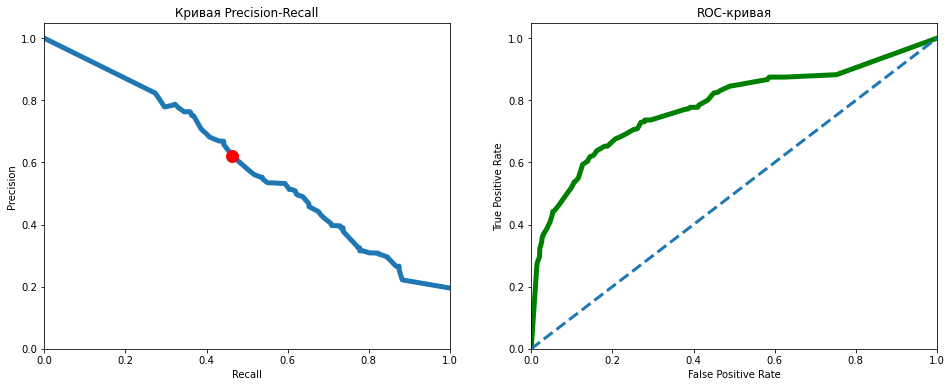

Wall time: 2.51 s


In [19]:
%%time

#Зададим диапазоны параметров для RandomizedSearch
parameters_DT = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': range(2,25),
              'min_samples_split': range(2,5),
              'min_samples_leaf' : range(1,5)}

dt_f1 = [] #список для сбора метрики f1

d_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state = RND_ST),parameters_DT,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
d_tree.fit(features_train,target_train)

model_researh(d_tree,features_valid,target_valid)
dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])
get_graf(d_tree,features_valid,target_valid)

### Логистическая регрессия

Параметры модели: LogisticRegression(C=1.1948148550775262, max_iter=650, penalty='none',
                   random_state=12345, solver='newton-cg')
Полученные метрики:
precision=0.567
recall=0.205
auc_roc=0.770
f1=0.301


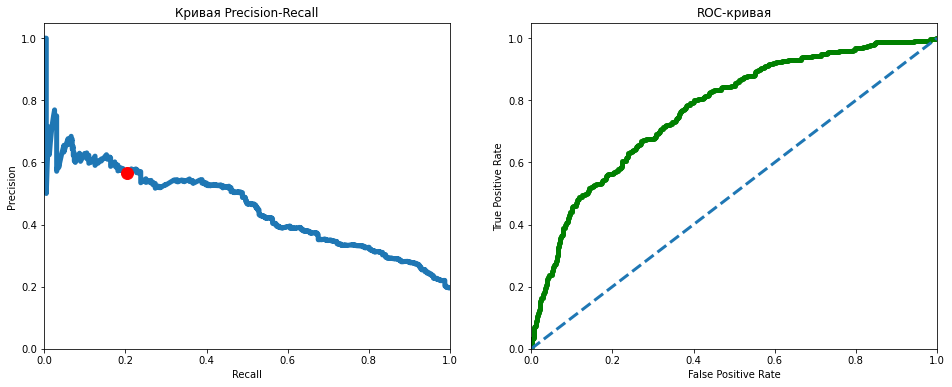

Wall time: 400 ms


In [20]:
%%time

#зададим диапазоны параметров для RandomizedSearch
parameters_L = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': range(100,1000,50),
              'C': uniform(loc=0, scale=4)}

L_f1 = [] #список для сбора метрики f1

logistic = RandomizedSearchCV(LogisticRegression(random_state = RND_ST),parameters_L,
                              random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
logistic.fit(features_train,target_train)

model_researh(logistic,features_valid,target_valid) 
L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])
get_graf(logistic,features_valid,target_valid)

### Модель Случаный лес

Параметры модели: RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=40,
                       random_state=12345)
Полученные метрики:
precision=0.749
recall=0.435
auc_roc=0.848
f1=0.550


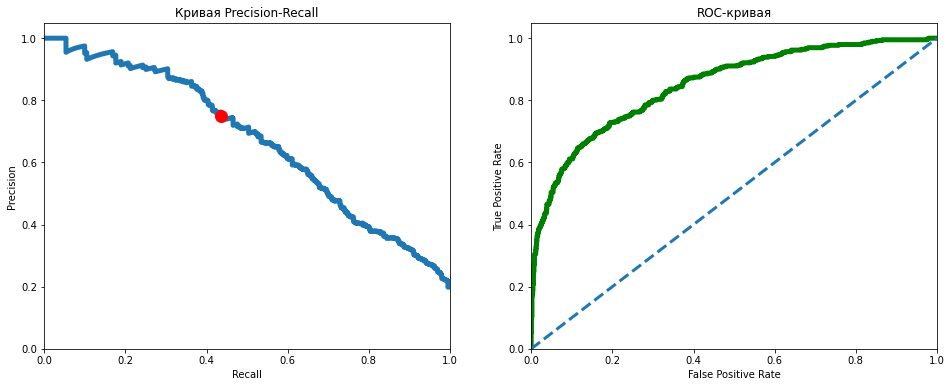

Wall time: 5.49 s


In [21]:
%%time

#зададим диапазоны параметров для RandomizedSearch
parameters_RF = {'n_estimators': range(20,500,20),
              'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': range(2,25),
              'min_samples_split': range(2,5),
              'min_samples_leaf' : range(1,5)}

RF_f1 = [] #список для сбора метрики f1

rand_forest = RandomizedSearchCV(RandomForestClassifier(random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_train,target_train)

model_researh(rand_forest,features_valid,target_valid)
RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])
get_graf(rand_forest,features_valid,target_valid)

**Вывод:** Лучше всего показала себя модель случайного леса, но метрика f1 = 0.55 < 0.6 не соответствует условиям ТЗ. Дерево решений показало несколько меньшую метрику f1 = 0.537. Хуже всех показала себя логистическая регрессия с метрикой f1 = 0.305.
Для улучшения модели по этой метрике требуется сбалансировать классы в обучающей выборке.

## Борьба с дисбалансом

Функция для upsampling выборки.

In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, 
                                            target_upsampled, random_state=RND_ST)
        
    return features_upsampled, target_upsampled

In [23]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [24]:
print(f'Соотношение классов: {features_upsampled[target == 0 ].shape[0] / features_upsampled[target == 1].shape[0]}')

Соотношение классов: 0.9805168170631665


### Дерево решений для нестрафицированной выборки.

На увеличенной выборке.

In [25]:
%%time
d_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state = RND_ST),parameters_DT,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
d_tree.fit(features_upsampled,target_upsampled)

model_researh(d_tree,features_valid,target_valid)
dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])

#get_graf(d_tree,features_valid,target_valid)

Параметры модели: DecisionTreeClassifier(max_depth=13, min_samples_split=3, random_state=12345)
Полученные метрики:
precision=0.420
recall=0.550
auc_roc=0.708
f1=0.476
Wall time: 268 ms


Применение баланса веса классов.

In [26]:
%%time
d_tree = RandomizedSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state = RND_ST),parameters_DT,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
d_tree.fit(features_train,target_train)

model_researh(d_tree,features_valid,target_valid)
dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])

#get_graf(d_tree,features_valid,target_valid)

Параметры модели: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_leaf=4, min_samples_split=3,
                       random_state=12345)
Полученные метрики:
precision=0.475
recall=0.670
auc_roc=0.792
f1=0.556
Wall time: 192 ms


### Логистическая регрессия для нестрафицированной выборки.

На upsampled выборке.

In [27]:
%%time
logistic = RandomizedSearchCV(LogisticRegression(random_state = RND_ST),parameters_L,
                              random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
logistic.fit(features_upsampled,target_upsampled)

model_researh(logistic,features_valid,target_valid)  
L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])

#get_graf(logistic,features_valid,target_valid)

Параметры модели: LogisticRegression(C=0.10715889955724167, max_iter=600, random_state=12345,
                   solver='liblinear')
Полученные метрики:
precision=0.364
recall=0.693
auc_roc=0.772
f1=0.478
Wall time: 212 ms


Применение баланса веса классов.(class_weight='balanced')

In [28]:
%%time
logistic = RandomizedSearchCV(LogisticRegression(class_weight='balanced',random_state = RND_ST),parameters_L,
                              random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
logistic.fit(features_train,target_train)

model_researh(logistic,features_valid,target_valid) 
L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])

#get_graf(logistic,features_valid,target_valid)

Параметры модели: LogisticRegression(C=0.10715889955724167, class_weight='balanced', max_iter=600,
                   random_state=12345, solver='liblinear')
Полученные метрики:
precision=0.367
recall=0.680
auc_roc=0.772
f1=0.477
Wall time: 153 ms


### Случайный лес для нестрафицированной выборки.

Увеличенная выборка.

In [29]:
%%time
rand_forest = RandomizedSearchCV(RandomForestClassifier(random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_upsampled,target_upsampled)

model_researh(rand_forest,features_valid,target_valid)
RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])

#get_graf(rand_forest,features_valid,target_valid)

Параметры модели: RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=3,
                       n_estimators=360, random_state=12345)
Полученные метрики:
precision=0.652
recall=0.537
auc_roc=0.847
f1=0.589
Wall time: 10.9 s


Баланс веса классов.(class_weight='balanced')

Параметры модели: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, min_samples_leaf=4, n_estimators=280,
                       random_state=12345)
Полученные метрики:
precision=0.634
recall=0.586
auc_roc=0.853
f1=0.609


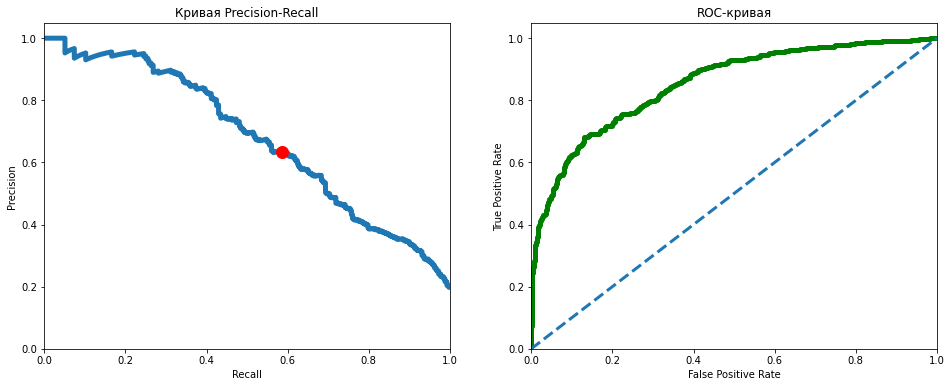

Wall time: 7.43 s


In [30]:
%%time
rand_forest = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced',random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_train,target_train)

model_researh(rand_forest,features_valid,target_valid)
RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])

get_graf(rand_forest,features_valid,target_valid)

Применим метод **stratify** при разделении выборок.

In [31]:
#Отделим тестовую выборку, но уже используя параметр stratify
features_split, features_test, target_split, target_test = train_test_split(features,target,test_size=0.2 ,random_state=12345,stratify = target)

#Разделим оставшуюся часть данных так же с параметром stratify
features_train, features_valid, target_train, target_valid = train_test_split(features_split,target_split,test_size=0.25 ,random_state=12345,stratify = target_split)

In [32]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [33]:
print(f'Соотношение классов: {features_upsampled[target == 0 ].shape[0] / features_upsampled[target == 1].shape[0]}')

Соотношение классов: 0.9764922322158627


### Дерево решений на стратифицированной выборке

Рассмотрим модели на стратифицированной выборке, увеличенной стратифицированной выборке, с применением *stratify* и *class_weight = 'balanced'*,с применением *stratify* , *class_weight = 'balanced'* и *upsample*.

In [34]:
%%time
d_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state = RND_ST),parameters_DT,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
d_tree.fit(features_train,target_train)

model_researh(d_tree,features_valid,target_valid)
dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])

#get_graf(d_tree,features_valid,target_valid)

Параметры модели: DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=3, random_state=12345)
Полученные метрики:
precision=0.721
recall=0.437
auc_roc=0.814
f1=0.544
Wall time: 195 ms


In [35]:
%%time
d_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state = RND_ST),parameters_DT,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
d_tree.fit(features_upsampled,target_upsampled)

model_researh(d_tree,features_valid,target_valid)
dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])

#get_graf(d_tree,features_valid,target_valid)

Параметры модели: DecisionTreeClassifier(max_depth=13, min_samples_split=3, random_state=12345)
Полученные метрики:
precision=0.481
recall=0.572
auc_roc=0.717
f1=0.523
Wall time: 248 ms


In [36]:
%%time
d_tree = RandomizedSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state = RND_ST),parameters_DT,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
d_tree.fit(features_train,target_train)

model_researh(d_tree,features_valid,target_valid)
dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])

#get_graf(d_tree,features_valid,target_valid)

Параметры модели: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=3, min_samples_split=4,
                       random_state=12345)
Полученные метрики:
precision=0.432
recall=0.784
auc_roc=0.839
f1=0.557
Wall time: 196 ms


In [37]:
#%%time
#d_tree = RandomizedSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state = RND_ST),parameters_DT,
                           #random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
#d_tree.fit(features_upsampled,target_upsampled)

#model_researh(d_tree,features_valid,target_valid)
#dt_f1.append(model_researh(d_tree,features_valid,target_valid,output=True)[3])

#get_graf(d_tree,features_valid,target_valid)

### Логистическая регрессия на стратифицированной выборке

Рассмотрим модели на стратифицированной выборке, увеличенной стратифицированной выборке, с применением *stratify* и *class_weight = 'balanced'*,с применением *stratify* , *class_weight = 'balanced'* и *upsample*.

In [38]:
%%time
logistic = RandomizedSearchCV(LogisticRegression(random_state = RND_ST),parameters_L,
                              random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
logistic.fit(features_train,target_train)

model_researh(logistic,features_valid,target_valid)  
L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])

#get_graf(logistic,features_valid,target_valid)

Параметры модели: LogisticRegression(C=1.1948148550775262, max_iter=650, penalty='none',
                   random_state=12345, solver='newton-cg')
Полученные метрики:
precision=0.674
recall=0.214
auc_roc=0.788
f1=0.325
Wall time: 2.02 s


In [39]:
%%time
logistic = RandomizedSearchCV(LogisticRegression(random_state = RND_ST),parameters_L,
                              random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
logistic.fit(features_upsampled,target_upsampled)

model_researh(logistic,features_valid,target_valid) 
L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])

#get_graf(logistic,features_valid,target_valid)

Параметры модели: LogisticRegression(C=1.1948148550775262, max_iter=650, penalty='none',
                   random_state=12345, solver='newton-cg')
Полученные метрики:
precision=0.388
recall=0.727
auc_roc=0.792
f1=0.506
Wall time: 2.29 s


In [40]:
%%time
logistic = RandomizedSearchCV(LogisticRegression(class_weight='balanced',random_state = RND_ST),parameters_L,
                              random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
logistic.fit(features_train,target_train)

model_researh(logistic,features_valid,target_valid)  
L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])

#get_graf(logistic,features_valid,target_valid)

Параметры модели: LogisticRegression(C=1.1948148550775262, class_weight='balanced', max_iter=650,
                   penalty='none', random_state=12345, solver='newton-cg')
Полученные метрики:
precision=0.396
recall=0.722
auc_roc=0.792
f1=0.511
Wall time: 1.47 s


In [41]:
#%%time
#logistic = RandomizedSearchCV(LogisticRegression(class_weight='balanced',random_state = RND_ST),parameters_L,
                              #random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
#logistic.fit(features_upsampled,target_upsampled)

#model_researh(logistic,features_valid,target_valid)  
#L_f1.append(model_researh(logistic,features_valid,target_valid,output=True)[3])

#get_graf(logistic,features_valid,target_valid)

### Случайный лес на стратифицированной выборке

Рассмотрим модели на стратифицированной выборке, увеличенной стратифицированной выборке, с применением *stratify* и *class_weight = 'balanced'*,с применением *stratify* , *class_weight = 'balanced'* и *upsample*.

In [42]:
%%time
rand_forest = RandomizedSearchCV(RandomForestClassifier(random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_train,target_train)

model_researh(rand_forest,features_valid,target_valid)
RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])

#get_graf(rand_forest,features_valid,target_valid)

Параметры модели: RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=3,
                       n_estimators=360, random_state=12345)
Полученные метрики:
precision=0.770
recall=0.445
auc_roc=0.862
f1=0.564
Wall time: 7.71 s


Параметры модели: RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_split=3,
                       n_estimators=360, random_state=12345)
Полученные метрики:
precision=0.676
recall=0.553
auc_roc=0.854
f1=0.608


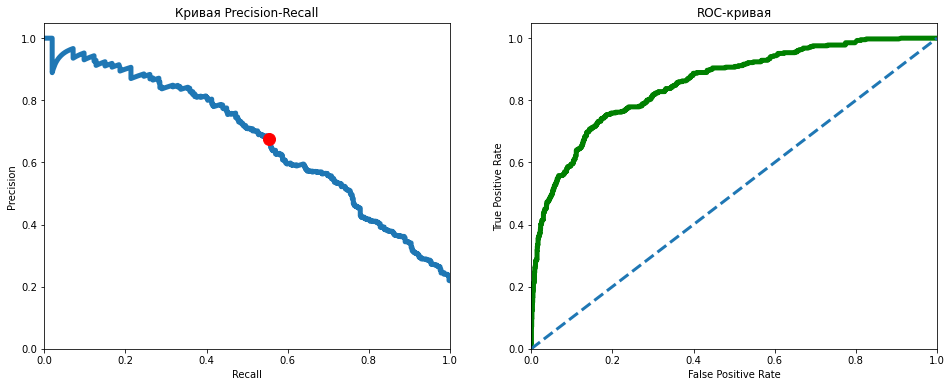

Wall time: 11.4 s


In [43]:
%%time
rand_forest = RandomizedSearchCV(RandomForestClassifier(random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_upsampled,target_upsampled)

model_researh(rand_forest,features_valid,target_valid)
RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])

get_graf(rand_forest,features_valid,target_valid)

Параметры модели: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, min_samples_leaf=4, n_estimators=280,
                       random_state=12345)
Полученные метрики:
precision=0.652
recall=0.612
auc_roc=0.869
f1=0.631


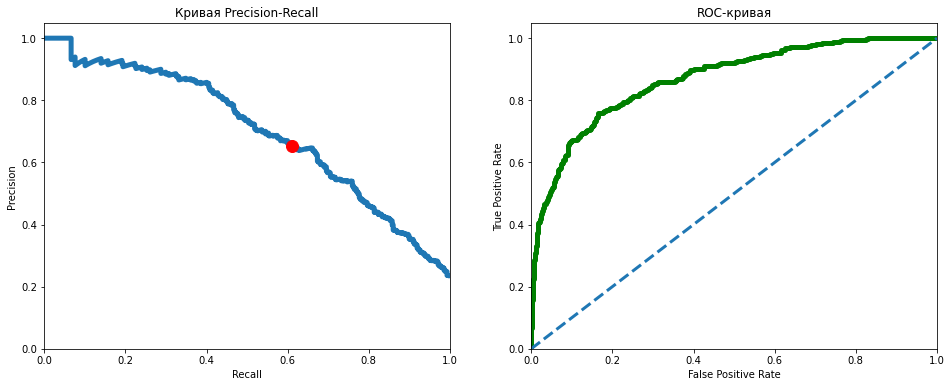

Wall time: 7.73 s


In [44]:
%%time
rand_forest = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced',random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_train,target_train)

model_researh(rand_forest,features_valid,target_valid)
RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])

get_graf(rand_forest,features_valid,target_valid)

In [45]:
#%%time
#rand_forest = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced',random_state = RND_ST),parameters_RF,
                           #random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
#rand_forest.fit(features_upsampled,target_upsampled)

#model_researh(rand_forest,features_valid,target_valid)
#RF_f1.append(model_researh(rand_forest,features_valid,target_valid,output=True)[3])

#get_graf(rand_forest,features_valid,target_valid)

### Полученные результаты

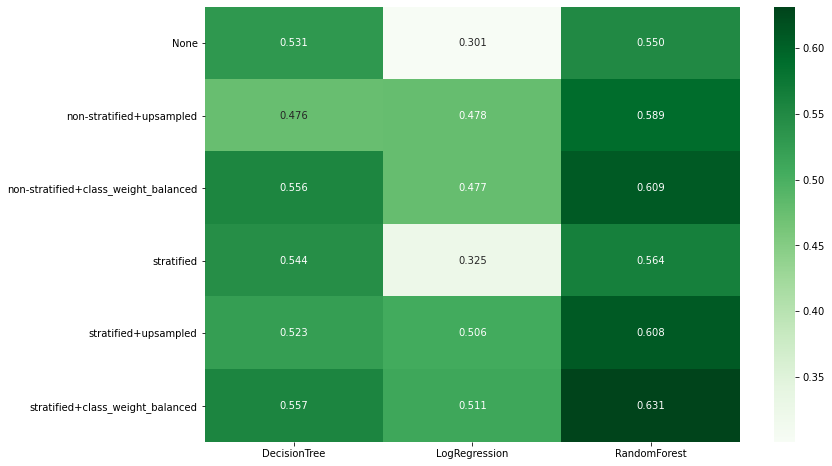

In [46]:
f1_results = pd.DataFrame(data={'DecisionTree':dt_f1, 'LogRegression':L_f1, 'RandomForest':RF_f1},index=['None', 'non-stratified+upsampled','non-stratified+class_weight_balanced','stratified','stratified+upsampled','stratified+class_weight_balanced']) #,'stratified+upsampled+class_weight_balanced'


plt.figure(figsize=(12,8))
sns.heatmap(f1_results,annot=True,fmt='.3f',cmap='Greens')
plt.show()

**Вывод:** Наилучшую метрику f1 = 0.631 показала модель RandomForest на стратифицированной выборке с class_weight='balanced'.

## Тестирование модели

Проверим метрики модели на тестовой выборке.

Параметры модели: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, min_samples_leaf=4, n_estimators=280,
                       random_state=12345)
Полученные метрики:
precision=0.653
recall=0.597
auc_roc=0.869
f1=0.624


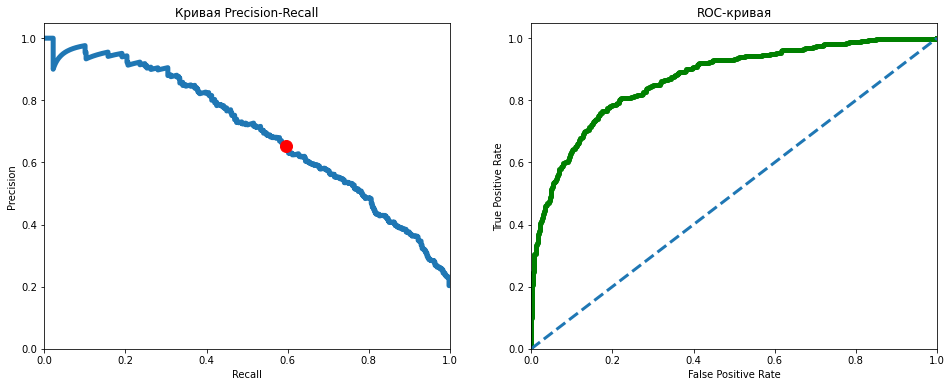

Wall time: 7.55 s


In [47]:
%%time
rand_forest = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced',random_state = RND_ST),parameters_RF,
                           random_state = RND_ST,n_iter=15, scoring='f1',n_jobs=-1)
rand_forest.fit(features_train,target_train)

model_researh(rand_forest,features_test,target_test)

get_graf(rand_forest,features_test,target_test)

**Вывод:** Модель показала себя успешно на тестовой выборке с метрикой f1 = 0.624 > 0.59.

## Общий вывод

Проведено исследование данных об оттоке клиентов из банка. 

Данный подготовлены для обучения моделей.

Рассмотрены модели дерева решений, логистической регрессии и случайного леса для прогнозирования ухода клиента. 

Рассмотрены различные методы борьбы с дисбалансом классов ( увеличение выборки,балансировка веса классов).

Получены 3 модели с F1-мерой > 0.59. Наилучшей оказалась модель случайного леса на стратифицированной выборке с учетом баланса классов (class_weight = 'balanced'). Для всех моделей измерена метрика AUC-ROC.

Модель показала успешные результаты на тестовой выборке.